In [1]:
import joblib
import numpy
import matplotlib.pyplot as plt
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit

In [2]:
def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()

In [3]:
### load in the dict of dicts containing all the data on each person in the dataset
data_dict = joblib.load( open("../final_project/final_project_dataset.pkl", "rb") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)

{'salary': 26704229,
 'to_messages': 'NaN',
 'deferral_payments': 32083396,
 'total_payments': 309886585,
 'loan_advances': 83925000,
 'bonus': 97343619,
 'email_address': 'NaN',
 'restricted_stock_deferred': -7576788,
 'deferred_income': -27992891,
 'total_stock_value': 434509511,
 'expenses': 5235198,
 'from_poi_to_this_person': 'NaN',
 'exercised_stock_options': 311764000,
 'from_messages': 'NaN',
 'other': 42667589,
 'from_this_person_to_poi': 'NaN',
 'poi': False,
 'long_term_incentive': 48521928,
 'shared_receipt_with_poi': 'NaN',
 'restricted_stock': 130322299,
 'director_fees': 1398517}

In [4]:
### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )

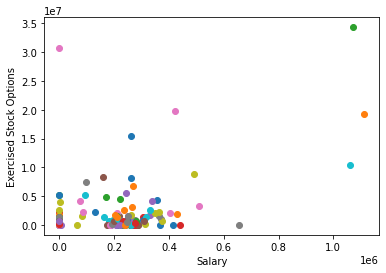

In [5]:
### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, f2 in finance_features:
    plt.scatter( f1, f2 )
plt.xlabel("Salary")
plt.ylabel("Exercised Stock Options")
plt.show()

## Clustering with 2 features "salary" and "exercised stock options"

In [6]:
# k-means clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(finance_features)
pred = kmeans.predict(finance_features)

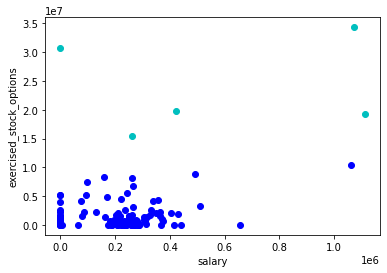

In [7]:
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print("No predictions object named pred found, no clusters to plot")

## Clustering with an extra feature "total_payments"

In [8]:
# trying to add one more feature to the features list
feature_3 = "total_payments"
features_list.append(feature_3)
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )

In [9]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(finance_features)
pred = kmeans.predict(finance_features)

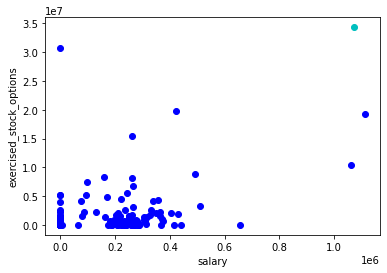

In [10]:
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters_3_features.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print("No predictions object named pred found, no clusters to plot")

As the result 4 points have changed their cluster

## Range in exercised stock options

In [13]:
# searching for max and min values for the exercised stock options
# we will transfer the data dict to pandas df for quicker computations
import pandas as pd

df = pd.DataFrame(data_dict)
df.loc['exercised_stock_options',:] = pd.to_numeric(df.loc['exercised_stock_options'], errors='coerce')
ex_stock_opt_max = df.loc['exercised_stock_options', :].max(skipna=True)
ex_stock_opt_min = df.loc['exercised_stock_options', :].min(skipna=True)
print("Max exercised stock option: ", ex_stock_opt_max)
print("Min exercised stock option: ", ex_stock_opt_min)

Max exercised stock option:  34348384.0
Min exercised stock option:  3285.0


## Range in salary

In [14]:
df.loc['salary', :] = pd.to_numeric(df.loc['salary'], errors='coerce')
salary_max = df.loc['salary', :].max(skipna=True)
salary_min = df.loc['salary', :].min(skipna=True)
print("Max salary: ", salary_max)
print("Min salary: ", salary_min)

Max salary:  1111258.0
Min salary:  477.0


## Feature Scaling

In [15]:
# scaling exercised stock options
df.loc['exercised_stock_options', :] = (df.loc['exercised_stock_options'] - ex_stock_opt_min)/(ex_stock_opt_max - ex_stock_opt_min)

In [16]:
# scaling salaries
df.loc['salary', :] = (df.loc['salary'] - ex_stock_opt_min)/(ex_stock_opt_max - ex_stock_opt_min)

In [25]:
# rescaled value for salary of $200.000
rescaled_200k_sal = (200000.0 - salary_min)/(salary_max - salary_min)
print("Rescaled $200.000 salary: %.2f" % rescaled_200k_sal)

Rescaled $200.000: 0.18


In [26]:
# rescaled value for exercised stock options
rescaled_1mil_opt = (1000000.0 - ex_stock_opt_min)/(ex_stock_opt_max - ex_stock_opt_min)
print("Rescaled $1.000.000 exercised stock option: %.2f" % rescaled_1mil_opt)

Rescaled $1.000.000 exercised stock option: 0.03


## Conclusion
Feature rescaling is necessary in this case since the ranges of salaries and exercised stock options vary from hundreds to single millions for salaries and from thousands to decimal millions for exercised stock options.